# Example 002: Extrapolation of simulation data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import iddefix
from scipy.constants import c

## Simulation data example

This example features CST simulated wakefield data of the "Accelerator Cavity" introductory example.

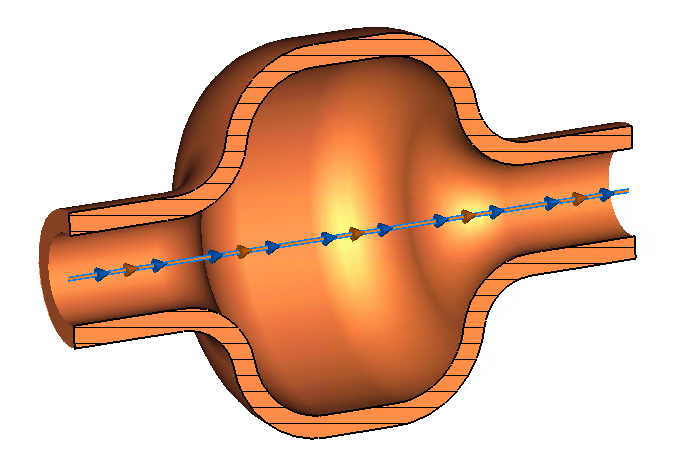

## Fitting on fully decayed wakefield

### Import data

In [2]:
# Importing impedance data
data_fully_decayed = np.loadtxt('data/002_impedance_acceleratorCavity_fully_decayed.txt', comments='#', delimiter='\t')

# Extracting frequency and impedance

frequency = data_fully_decayed[:,0]*1e9 # Convert to GHz
real_impedance = data_fully_decayed[:,1]
imag_impedance = data_fully_decayed[:,2]

impedance_fd = real_impedance + 1j*imag_impedance


Visually inspecting the impedance

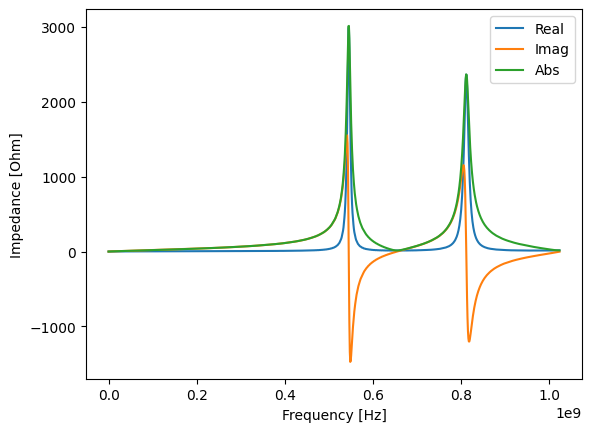

In [3]:
plt.plot(frequency, impedance_fd.real, label='Real')
plt.plot(frequency, impedance_fd.imag, label='Imag')
plt.plot(frequency, np.abs(impedance_fd), label='Abs')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Impedance [Ohm]')
plt.legend()

### Fitting resonators with IDDEFIX on the absolute magnitude of the 3 resonator impdance spectrum

In [4]:
# Setting amount of resonators to fit

Nres = 2

# Bounds on resonators parameters
""" In this example, we will use the SmartBoundDetermination class to determine the bounds on the resonators parameters. 
By using SmartBoundDetermination ther is no need to specify the bounds manually."""

SBD_parameterBound = iddefix.SmartBoundDetermination(frequency, impedance_fd, minimum_peak_height=1000)

#### Running IDDEFIX DE
Running the DE algorithm with IDDEFIX and chosen parameters.

In [5]:
%%time
DE_model_fd = iddefix.EvolutionaryAlgorithm(frequency, 
                                         impedance_fd,
                                         N_resonators=Nres, 
                                         parameterBounds=SBD_parameterBound.find(),
                                         plane="longitudinal", 
                                         objectiveFunction=iddefix.ObjectiveFunctions.sumOfSquaredError)

DE_model_fd.run_differential_evolution(maxiter=30000,
                                    popsize=30,
                                    tol=0.01,
                                    mutation=(0.4, 1.0),
                                    crossover_rate=0.7)
print(DE_model_fd.warning)


Optimization Progress:   0%|          | 105/30000 [00:00<03:46, 131.78it/s]



----------------------------------------------------------------------
Resonator |   Rs [Ohm/m or Ohm]    |        Q         |    fres [Hz]     
----------------------------------------------------------------------
    1     |        3.03e+03        |      69.78       |    5.453e+08     
    2     |        2.37e+03        |      65.20       |    8.123e+08     
----------------------------------------------------------------------
Optimization terminated successfully.
CPU times: user 696 ms, sys: 131 ms, total: 827 ms
Wall time: 801 ms


#### Minimization step
To further refine the solution obtained by the DE algorithm, a second optimization step is applied using the Nelder-Mead minimization algorithm.

In [6]:
DE_model_fd.run_minimization_algorithm()

Method for minimization : Nelder-Mead


----------------------------------------------------------------------
Resonator |   Rs [Ohm/m or Ohm]    |        Q         |    fres [Hz]     
----------------------------------------------------------------------
    1     |        3.03e+03        |      69.88       |    5.453e+08     
    2     |        2.36e+03        |      64.55       |    8.123e+08     
----------------------------------------------------------------------


### Assesing the fitting visually

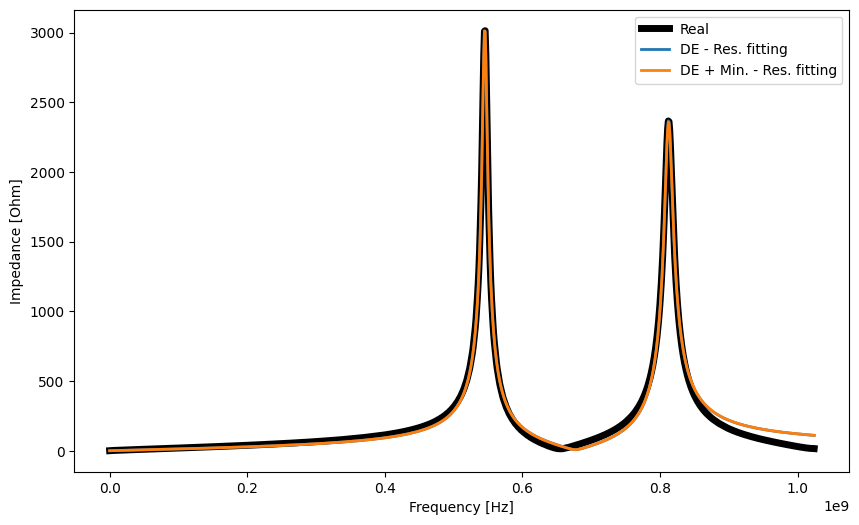

In [7]:
plt.figure(figsize=(10, 6))
result_DE = np.abs(iddefix.Impedances.n_Resonator_longitudinal_imp(frequency, DE_model_fd.evolutionParameters))
result_DE_MIN = np.abs(iddefix.Impedances.n_Resonator_longitudinal_imp(frequency, DE_model_fd.minimizationParameters))

plt.plot(frequency, np.abs(impedance_fd), lw=5, label='Real', color='black')
plt.plot(frequency, result_DE,  lw=2, label='DE - Res. fitting')
plt.plot(frequency, result_DE_MIN,  lw=2, label='DE + Min. - Res. fitting')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Impedance [Ohm]')
plt.legend()

## Fitting on partially decayed wakefield

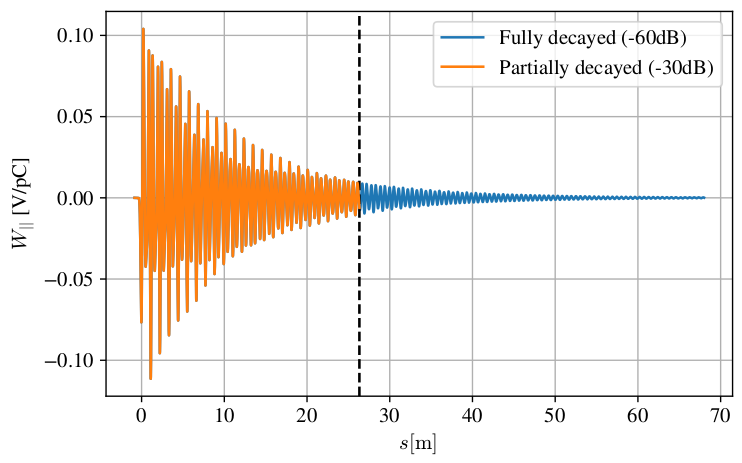

### Import data

In [8]:
# Importing impedance data
data_partially_decayed = np.loadtxt('data/002_impedance_acceleratorCavity_partially_decayed.txt', comments='#', delimiter='\t')

# Extracting frequency and impedance

frequency = data_partially_decayed[:,0]*1e9 # Convert to GHz
real_impedance = data_partially_decayed[:,1]
imag_impedance = data_partially_decayed[:,2]

impedance_pd = real_impedance + 1j*imag_impedance

Visually inspecting the impedance

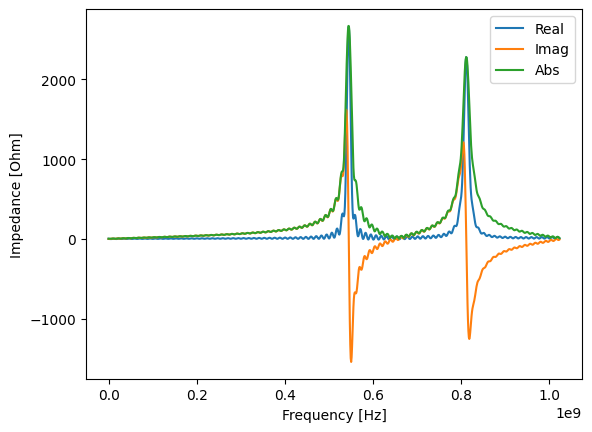

In [9]:
plt.plot(frequency, impedance_pd.real, label='Real')
plt.plot(frequency, impedance_pd.imag, label='Imag')
plt.plot(frequency, np.abs(impedance_pd), label='Abs')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Impedance [Ohm]')
plt.legend()

### Fitting resonators with IDDEFIX

In [10]:
# Setting amount of resonators to fit

Nres = 2

# Bounds on resonators parameters
""" Bounds have this format [(Rs_min, Rs_max), (Q_min, Q_max), (fres_min, fres_max)].
ParameterBounds allows us to manually add a resonator with desired parameters """

bounds = [(1e3, 1e4), (1, 1e3), (0.4e9, 0.9e9)] # Bounds have this format [(Rs_min, Rs_max), (Q_min, Q_max), (fres_min, fres_max)].
parameterBounds = Nres * bounds

#### Running IDDEFIX DE
Running the DE algorithm with IDDEFIX and chosen parameters.

In [11]:
%%time
DE_model_pd = iddefix.EvolutionaryAlgorithm(frequency, 
                                         impedance_pd,
                                         N_resonators=Nres, 
                                         parameterBounds=parameterBounds,
                                         plane="longitudinal", 
                                         wake_length=25.4,
                                         objectiveFunction=iddefix.ObjectiveFunctions.sumOfSquaredError)

DE_model_pd.run_differential_evolution(maxiter=30000,
                                    popsize=30,
                                    tol=0.01,
                                    mutation=(0.4, 1.0),
                                    crossover_rate=0.7)
print(DE_model_pd.warning)


Optimization Progress:   1%|          | 229/30000 [00:02<04:51, 102.18it/s]



----------------------------------------------------------------------
Resonator |   Rs [Ohm/m or Ohm]    |        Q         |    fres [Hz]     
----------------------------------------------------------------------
    1     |        2.37e+03        |      65.46       |    8.122e+08     
    2     |        3.09e+03        |      72.73       |    5.452e+08     
----------------------------------------------------------------------
Optimization terminated successfully.
CPU times: user 1.73 s, sys: 256 ms, total: 1.99 s
Wall time: 2.24 s


#### Minimization step

In [12]:
DE_model_pd.run_minimization_algorithm()

Method for minimization : Nelder-Mead


----------------------------------------------------------------------
Resonator |   Rs [Ohm/m or Ohm]    |        Q         |    fres [Hz]     
----------------------------------------------------------------------
    1     |        2.36e+03        |      64.98       |    8.123e+08     
    2     |        3.05e+03        |      71.79       |    5.453e+08     
----------------------------------------------------------------------


### Assesing the fitting visually

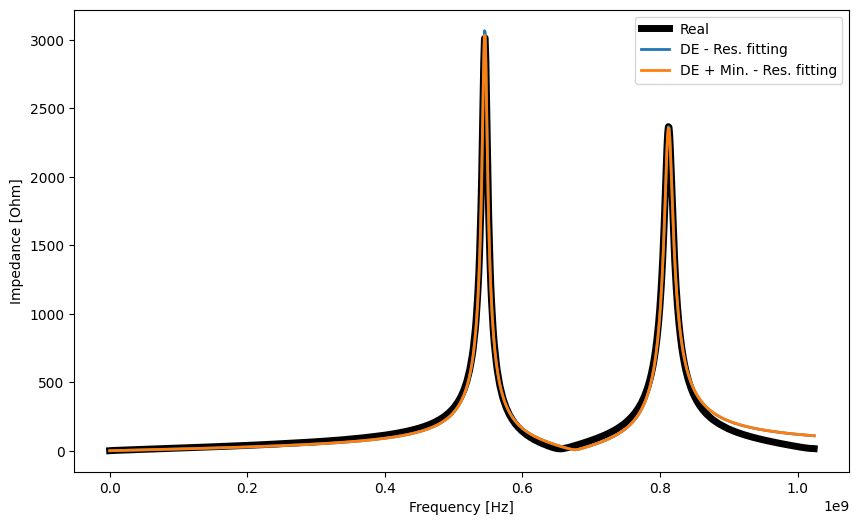

In [13]:
plt.figure(figsize=(10, 6))
result_DE = np.abs(iddefix.Impedances.n_Resonator_longitudinal_imp(frequency, DE_model_pd.evolutionParameters))
result_DE_MIN = np.abs(iddefix.Impedances.n_Resonator_longitudinal_imp(frequency, DE_model_pd.minimizationParameters))

plt.plot(frequency, np.abs(impedance_fd), lw=5, label='Real', color='black')
plt.plot(frequency, result_DE,  lw=2, label='DE - Res. fitting')
plt.plot(frequency, result_DE_MIN,  lw=2, label='DE + Min. - Res. fitting')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Impedance [Ohm]')
plt.legend()

Having fitted the resonators, we are also able to produce the wake function for any given wakelength:

Text(0, 0.5, 'Transverse wake function [V/pC]')

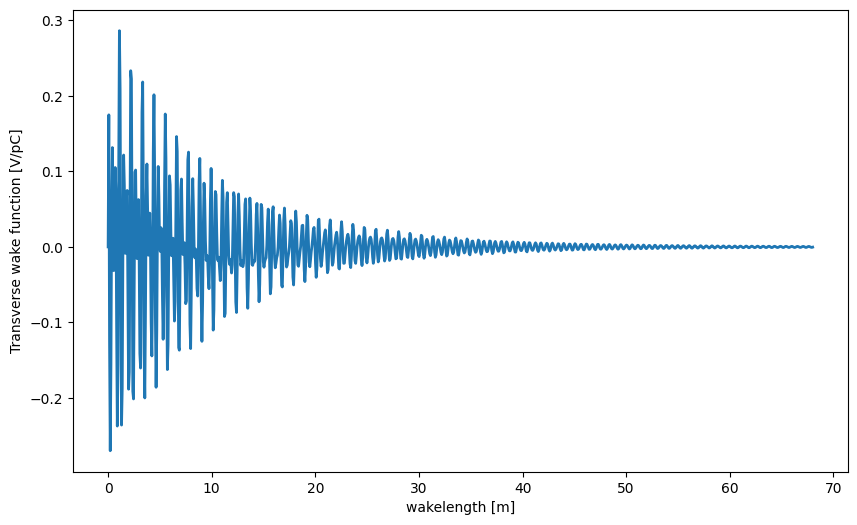

In [14]:
plt.figure(figsize=(10, 6))

timeframe = np.linspace(0, 68, 1000)/c

wake_function = iddefix.Wakes.n_Resonator_longitudinal_wake(timeframe, DE_model_pd.minimizationParameters))/1e12

plt.plot(timeframe*c, wake_function,  lw=2, label='DE - Res. fitting')
plt.xlabel('wakelength [m]')
plt.ylabel('Transverse wake function [V/pC]')